In [1]:
import boto3
import sagemaker
import time
import pandas as pd
import numpy as np

role = sagemaker.get_execution_role()
region = boto3.Session().region_name
sagemaker_session = sagemaker.Session()
bucket_name = sagemaker_session.default_bucket()
prefix = 'endtoendmlsm'

print(region)
print(role)
print(bucket_name)

eu-west-1
arn:aws:iam::041631420165:role/service-role/AmazonSageMaker-ExecutionRole-20180507T143636
sagemaker-eu-west-1-041631420165


In [2]:
s3 = boto3.resource('s3')

file_key = 'data/raw/windturbine_raw_data.csv'
copy_source = {
    'Bucket': 'gianpo-public',
    'Key': 'endtoendml/{0}'.format(file_key)
}

s3.Bucket(bucket_name).copy(copy_source, '{0}/'.format(prefix) + file_key)
#sagemaker_session.upload_data('/home/ec2-user/SageMaker/windturbine_raw_data_2.csv', bucket=bucket_name, key_prefix='endtoendmlsm/data/raw')


In [3]:
sagemaker_session.download_data(path='.', bucket=bucket_name, key_prefix='endtoendmlsm/data/raw/windturbine_raw_data.csv', extra_args=None)

In [4]:
original_ds = pd.read_csv('./windturbine_raw_data.csv', names = ['turbine_id','turbine_type','wind_speed','rpm_blade','oil_temperature','oil_level','temperature','humidity','vibrations_frequency','pressure','wind_direction','breakdown'])
original_ds.head()

,turbine_id,turbine_type,wind_speed,rpm_blade,oil_temperature,oil_level,temperature,humidity,vibrations_frequency,pressure,wind_direction,breakdown
0,TID003,HAWT,80,61,NaN,34,33,26,1,77,E,no
1,TID010,HAWT,85,78,36.0,28,35,43,15,62,NE,yes
2,TID007,HAWT,47,31,31.0,23,46,62,15,32,N,no
3,TID008,VAWT,73,70,38.0,8,17,66,6,80,SW,yes
4,TID003,HAWT,16,23,46.0,9,76,53,14,29,W,no


In [5]:
original_ds.describe(include='all')

,turbine_id,turbine_type,wind_speed,rpm_blade,oil_temperature,oil_level,temperature,humidity,vibrations_frequency,pressure,wind_direction,breakdown
count,1000000,899893,1000000.000000,1000000.000000,961703.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000,1000000
unique,10,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2
top,TID004,HAWT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,no
freq,100268,699712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125438,863421
mean,NaN,NaN,49.990414,50.010095,37.435021,19.998577,50.023570,50.014965,7.994064,49.985960,NaN,NaN
std,NaN,NaN,20.486019,20.498963,7.640262,8.944855,20.496239,20.483369,4.319314,20.501076,NaN,NaN
min,NaN,NaN,15.000000,15.000000,25.000000,5.000000,15.000000,15.000000,1.000000,15.000000,NaN,NaN
25%,NaN,NaN,32.000000,32.000000,31.000000,12.000000,32.000000,32.000000,4.000000,32.000000,NaN,NaN
50%,NaN,NaN,50.000000,50.000000,37.000000,20.000000,50.000000,50.000000,8.000000,50.000000,NaN,NaN
75%,NaN,NaN,68.000000,68.000000,44.000000,28.000000,68.000000,68.000000,12.000000,68.000000,NaN,NaN


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

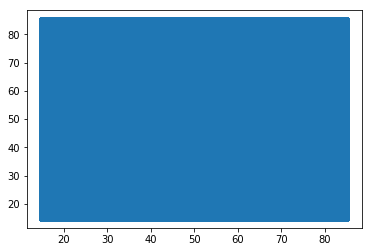

In [7]:
plt.scatter(original_ds.wind_speed, original_ds.rpm_blade)

(array([13953., 14122., 14011., 14103., 14166., 14204., 14186., 14149.,
        14064., 14238., 14053., 13841., 14070., 14233., 14102., 14092.,
        13927., 13910., 13896., 14147., 14008., 14061., 14036., 14018.,
        14324., 14259., 14181., 14003., 13895., 14238., 14184., 14134.,
        14184., 13931., 13966., 14324., 14090., 14107., 14321., 13983.,
        14106., 14068., 13922., 14048., 14227., 14075., 14071., 14100.,
        14256., 13867., 14219., 14019., 14264., 14287., 14084., 14132.,
        13818., 13861., 14102., 14115., 14230., 14048., 13812., 14059.,
        14105., 14088., 14088., 14091., 13992., 28132.]),
 array([15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
        41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
        54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66.,
        67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79.,
 

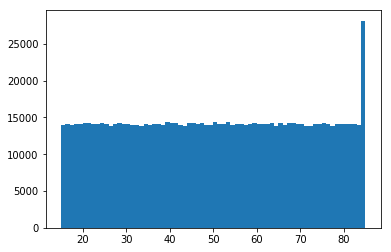

In [8]:
plt.hist(original_ds.wind_speed, bins=70)

In [9]:
#wind_speed: gaussian, mean=50, std=30
ws = abs(np.random.normal(50, 30, 1000000)).astype(int)
#temperature: gaussian, mean=20, std=18
temp = abs(np.random.normal(20, 18, 1000000)).astype(int)
#humidity: gaussian, mean=50, std=5
hum = abs(np.random.normal(50, 5, 1000000)).astype(int)
#pressure: gaussian, mean=40, std=25
press = abs(np.random.normal(40, 25, 1000000)).astype(int)
#oil_level: uniform, min=5, max=35
oil_lev = np.random.uniform(5,35,1000000).astype(int)
#rpm_blade: alpha*wind_speed + error
alpha = 5
rpm_blade = abs(alpha*ws + np.random.normal(0,30,1000000)).astype(int)
#vibration_freq: beta*rpm_blade + gamma*pressure + error
beta = 3.5
gamma = 2
vibration_freq = abs(beta*rpm_blade + gamma*press + np.random.normal(0,50,1000000)).astype(int)
#oil_temp: delta*temp + error
#delta = 4.5
#oil_temperature = abs(delta*temp + np.random.normal(0,50,1000000)).astype(int)
#breakdown: k1*rpm_blade + k2*vibration_freq + k3*oil_temp + error

In [10]:
new_dataset = pd.DataFrame()

In [11]:
new_dataset['turbine_id'] = original_ds['turbine_id']
new_dataset['turbine_type'] = original_ds['turbine_type']
new_dataset['wind_direction'] = original_ds['wind_direction']
new_dataset['wind_speed'] = ws
new_dataset['temperature'] = temp
new_dataset['humidity'] = hum
new_dataset['pressure'] = press
new_dataset['oil_level'] = oil_lev
new_dataset['rpm_blade'] = rpm_blade
new_dataset['vibrations_frequency'] = vibration_freq
new_dataset['oil_temperature'] = original_ds['oil_temperature']

In [12]:
new_dataset.describe()

,wind_speed,temperature,humidity,pressure,oil_level,rpm_blade,vibrations_frequency,oil_temperature
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,961703.000000
mean,50.660304,21.924502,49.487475,40.603782,19.486198,253.479164,968.070018,37.435021
std,27.918782,14.896999,5.009584,23.000590,8.653588,141.542165,499.813674,7.640262
min,0.000000,0.000000,26.000000,0.000000,5.000000,0.000000,0.000000,25.000000
25%,30.000000,10.000000,46.000000,23.000000,12.000000,146.000000,589.000000,31.000000
50%,50.000000,20.000000,49.000000,39.000000,19.000000,247.000000,946.000000,37.000000
75%,70.000000,32.000000,53.000000,56.000000,27.000000,350.000000,1308.000000,44.000000
max,195.000000,104.000000,74.000000,170.000000,34.000000,973.000000,3470.000000,50.000000


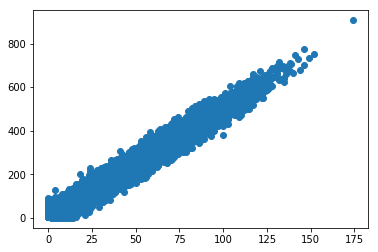

In [13]:
plt.scatter(new_dataset['wind_speed'][:10000], new_dataset['rpm_blade'][:10000])

(array([1.383e+03, 1.896e+03, 2.340e+03, 2.077e+03, 1.448e+03, 6.240e+02,
        1.830e+02, 4.300e+01, 5.000e+00, 1.000e+00]),
 array([  0. ,  90.7, 181.4, 272.1, 362.8, 453.5, 544.2, 634.9, 725.6,
        816.3, 907. ]),
 <a list of 10 Patch objects>)

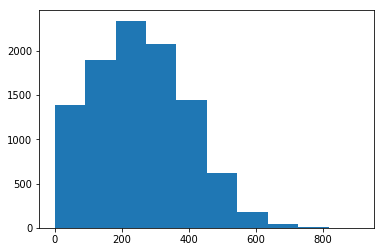

In [14]:
plt.hist(new_dataset['rpm_blade'][:10000])

In [15]:
from scipy.special import expit

In [16]:
k1=0.0003
k2=0.0005
k3=0.0033
breakdown = k1*rpm_blade + k2*vibration_freq + k3*oil_lev + np.random.normal(0,0.1,1000000)

new_dataset['breakdown_num'] = breakdown
new_dataset.loc[new_dataset['breakdown_num'] <= 0.9, 'breakdown'] = 'no' 
new_dataset.loc[new_dataset['breakdown_num'] > 0.9, 'breakdown'] = 'yes' 

In [17]:
new_dataset.describe(include='all')

,turbine_id,turbine_type,wind_direction,wind_speed,temperature,humidity,pressure,oil_level,rpm_blade,vibrations_frequency,oil_temperature,breakdown_num,breakdown
count,1000000,899893,1000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,961703.000000,1000000.000000,1000000
unique,10,2,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,TID004,HAWT,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,100268,699712,125438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,808024
mean,NaN,NaN,NaN,50.660304,21.924502,49.487475,40.603782,19.486198,253.479164,968.070018,37.435021,0.624495,NaN
std,NaN,NaN,NaN,27.918782,14.896999,5.009584,23.000590,8.653588,141.542165,499.813674,7.640262,0.310046,NaN
min,NaN,NaN,NaN,0.000000,0.000000,26.000000,0.000000,5.000000,0.000000,0.000000,25.000000,-0.412482,NaN
25%,NaN,NaN,NaN,30.000000,10.000000,46.000000,23.000000,12.000000,146.000000,589.000000,31.000000,0.394694,NaN
50%,NaN,NaN,NaN,50.000000,20.000000,49.000000,39.000000,19.000000,247.000000,946.000000,37.000000,0.611741,NaN
75%,NaN,NaN,NaN,70.000000,32.000000,53.000000,56.000000,27.000000,350.000000,1308.000000,44.000000,0.834807,NaN


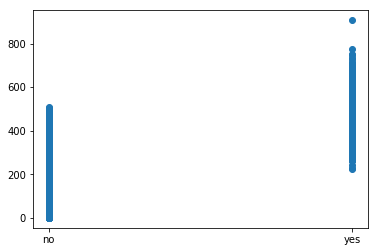

In [18]:
plt.scatter(new_dataset['breakdown'][:10000], new_dataset['rpm_blade'][:10000])

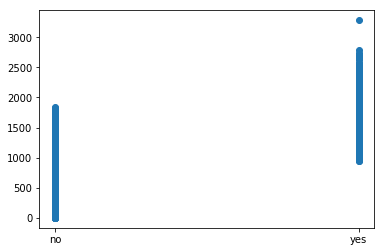

In [19]:
plt.scatter(new_dataset['breakdown'][:10000], new_dataset['vibrations_frequency'][:10000])

In [20]:
final_dataset = new_dataset
final_dataset = final_dataset.drop(columns=['breakdown_num'])
final_dataset.to_csv('windturbine_raw_data.csv', index=False, columns = ['turbine_id','turbine_type','wind_speed','rpm_blade','oil_temperature','oil_level','temperature','humidity','vibrations_frequency','pressure','wind_direction','breakdown'])

In [21]:
sagemaker_session.upload_data('windturbine_raw_data.csv', bucket=bucket_name, key_prefix='endtoendmlsm/data/raw')

's3://sagemaker-eu-west-1-041631420165/endtoendmlsm/data/raw/windturbine_raw_data.csv'